In [1]:
import tensorflow as tf
import numpy as np
import os
import pickle as pk
from zipfile import ZipFile
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import re
import pathlib
import matplotlib.pyplot as plt

In [2]:
# load cifar100 dataset
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
zip_path = '/content/drive/MyDrive/dataset/augmented_images.zip'
extract_path = '/content/drive/MyDrive/dataset/augmented_images'
metafile_path  = '/content/drive/MyDrive/dataset/meta'
def unzip_file(zip_path,extract_path):
  if not os.path.exists(extract_path):
    with ZipFile(zip_path, 'r') as zip:
      zip.extractall(extract_path)
    print(f'file extracted to {extract_path}')


In [3]:
# normalize the dataset
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
data_dir = pathlib.Path(extract_path)

In [ ]:
# get class names
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names.tolist()
print(class_names)

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

In [ ]:
# Split the dataset into X and y
X=[]
y=[]
image=[]
for i in class_names:
  class_num = class_names.index(i)
  path = os.path.join(extract_path,i)
  for j in os.listdir(path):
    img = tf.keras.utils.load_img(os.path.join(path,j),target_size=(32,32))
    img_array = tf.keras.utils.img_to_array(img)
    X.append(img_array)
    y.append(class_num)
    image.append(img)


In [ ]:
X=np.array(X,dtype=np.float32)/255.0
y=np.array(y,dtype = np.int32)
image=np.array(image)

In [ ]:
# split the Dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0,
    horizontal_flip=True)
datagen.fit(X_train)


# Baseline Deep learning Models

# CNN

In [9]:
def baseline_model_CNN(input_shape,num_classes):
  model = Sequential([
      Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
                      MaxPooling2D((2,2)),
                      Conv2D(64,(3,3),activation='relu'),
                      MaxPooling2D((2,2)),
                      Flatten(),
                      Dense(128,activation='relu'),
                      Dropout(0.5),
                      Dense(num_classes,activation='softmax')
                      ])
  return model

shape = (32,32,3)
num_classes = 100
model = baseline_model_CNN(shape,num_classes)
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 327,332 (1.25 MB)

 Trainable params: 327,332 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(datagen.flow(X_train,y_train,batch_size=64),epochs=10,validation_data=(X_test,y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.0359 - loss: 4.3851 - val_accuracy: 0.1467 - val_loss: 3.6807
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 51ms/step - accuracy: 0.1098 - loss: 3.7969 - val_accuracy: 0.1970 - val_loss: 3.3751
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.1472 - loss: 3.5859 - val_accuracy: 0.2354 - val_loss: 3.1873
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.1656 - loss: 3.4680 - val_accuracy: 0.2509 - val_loss: 3.0812
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.1823 - loss: 3.3942 - val_accuracy: 0.2629 - val_loss: 3.0337
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.1921 - loss: 3.3350 - val_accuracy: 0.2737 - val_loss: 2.9712
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.1996 - loss: 3.2820 - val_accuracy: 0.2851 - val_loss: 2.9098
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.2089 - loss: 3.2327 - val_accurac

In [5]:
def evaluate_model(model,X_test,y_test):
  test_loss, test_acc = model.evaluate(X_test, y_test)
  print(f"Test Accuracy: {test_acc*100:.4f}")

In [13]:
evaluate_model(model,X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3045 - loss: 2.8005
Test Accuracy: 30.2000


In [15]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test,y_pred,average='weighted')
print(f"Precision: {precision*100:.4f}")
print(f"Recall: {recall*100:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Precision: 29.4074
Recall: 30.2000


In [6]:
def plot_metrics(history,model_name=''):

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(10)

  # accuracy plot
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)

  plt.plot(epochs,acc,label='Training Accuracy')
  plt.plot(epochs,val_acc,label='Validation Accuracy')
  plt.title(f'{model_name} Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

  # loss plot
  plt.subplot(1,2,2)

  plt.plot(loss,label='Training Loss')
  plt.plot(val_loss,label='Validation Loss')
  plt.title(f'{model_name} loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc='lower right')

  plt.show()

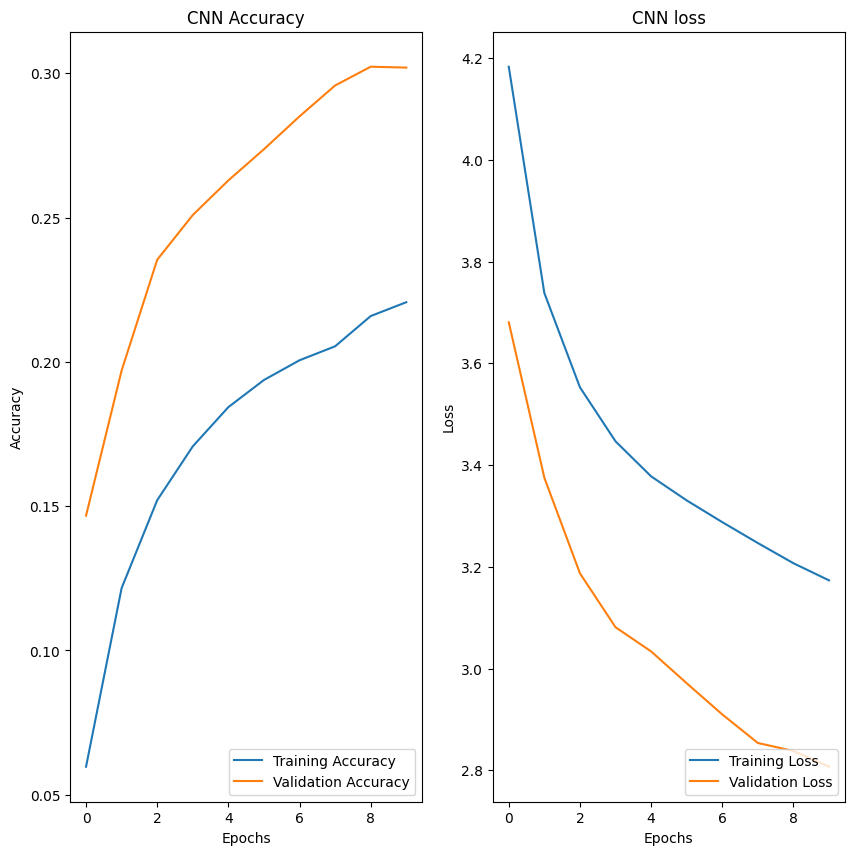

In [17]:
plot_metrics(history,'CNN')

# ResNet

In [7]:
from tensorflow.keras.applications import ResNet50

In [9]:
baseline_model_resnet = ResNet50(weights='imagenet',include_top=False,input_shape=(32,32,3))

# freeze the base model layers to pre trained weights
baseline_model_resnet.trainable = False

# Build the custome model
model_resnet = Sequential([
    baseline_model_resnet,
    layers.GlobalAveragePooling2D(),  # Pooling layer
    layers.Dense(512,activation='relu'),
    layers.Dense(258,activation='softmax'),
    #Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(100,activation='softmax')
])

model_resnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 258)                 │         132,354 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          33,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,815,206 (94.66 MB)

 Trainable params: 1,227,494 (4.68 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
model_resnet.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history_resnet = model_resnet.fit(datagen.flow(X_train,y_train,batch_size=64),epochs=10,validation_data=(X_test,y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 64ms/step - accuracy: 0.0100 - loss: 4.6076 - val_accuracy: 0.0100 - val_loss: 4.6053
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 48ms/step - accuracy: 0.0105 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.0096 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.0094 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.0096 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.0096 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.0084 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.0086 - loss: 4.6055 - val_accurac

In [12]:
evaluate_model(model_resnet,X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0096 - loss: 4.6052
Test Accuracy: 1.0000


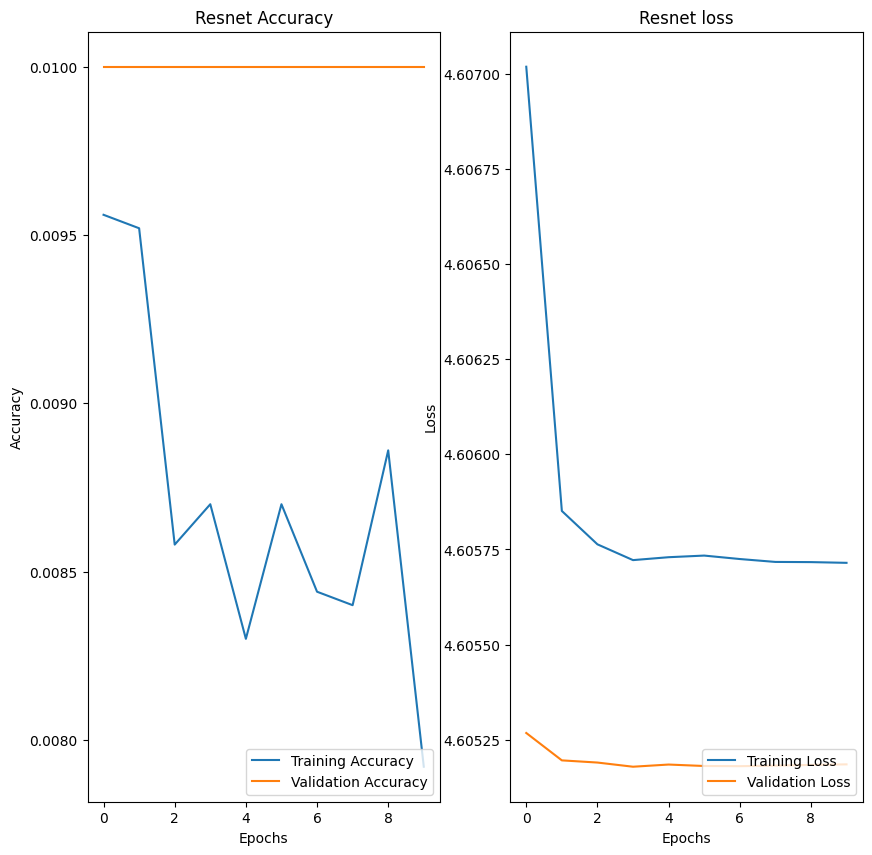

In [13]:
plot_metrics(history_resnet,'Resnet')

In [15]:
y_pred_ = model_resnet.predict(X_test)
y_pred_ = np.argmax(y_pred_,axis=1)
precision_ = precision_score(y_test,y_pred_,average='weighted')
recall_ = recall_score(y_test,y_pred_,average='weighted')
print(f"Precision: {precision_*100:.4f}")
print(f"Recall: {recall_*100:.4f}" )

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step
Precision: 0.0100
Recall: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Improved Model Architecture

In [ ]:
def create_cnn_model():
    model_1 =Sequential([
        # First Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        # Fully Connected Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')  # 100 classes for CIFAR-100
    ])

    model_1.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model_1



In [ ]:
# Create and train the CNN model
improved_cnn_model = create_cnn_model()
improved_cnn_model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,479,652 (32.35 MB)

 Trainable params: 8,479,396 (32.35 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
# Train the model
cnn_history = improved_cnn_model.fit(
    datagen.flow(X_train,y_train,batch_size=64),
    validation_data=(X_test,y_test),
    epochs=10,
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.0116 - loss: 5.1199 - val_accuracy: 0.0087 - val_loss: 4.6060
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.0098 - loss: 4.6054 - val_accuracy: 0.0082 - val_loss: 4.6068
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - accuracy: 0.0101 - loss: 4.6053 - val_accuracy: 0.0081 - val_loss: 4.6072
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.0085 - loss: 4.6057 - val_accuracy: 0.0079 - val_loss: 4.6074
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - accuracy: 0.0099 - loss: 4.6060 - val_accuracy: 0.0079 - val_loss: 4.6076
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.0106 - loss: 4.6049 - val_accuracy: 0.0079 - val_loss: 4.6077
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.0105 - loss: 4.6054 - val_accuracy: 0.0079 - val_loss: 4.6078
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.0103 - loss: 4.6054 - val_accurac

In [ ]:
evaluate_model(improved_cnn_model,X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0084 - loss: 4.6077
Test Accuracy: 0.8100


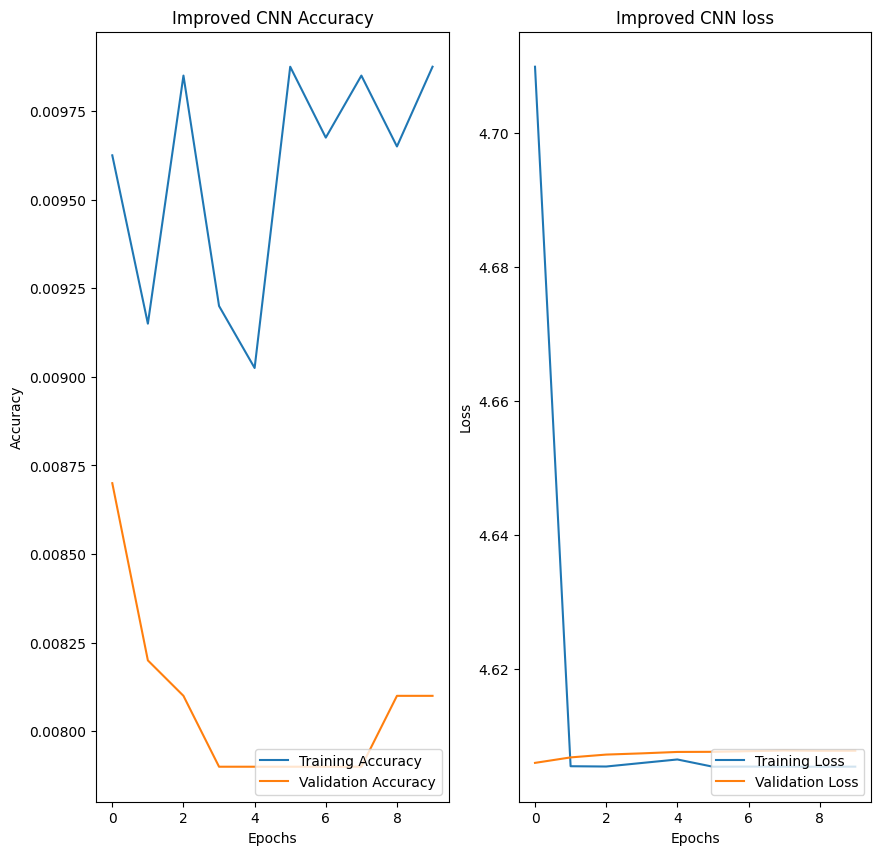

In [ ]:
plot_metrics(cnn_history,'Improved CNN')

In [ ]:

def create_resnet_model():
    # Load pre-trained ResNet50
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False  # Freeze base layers initially

    model = Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the ResNet model





In [ ]:
resnet_model = create_resnet_model()
resnet_model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,688,100 (94.18 MB)

 Trainable params: 1,100,388 (4.20 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model
resnet_history = resnet_model.fit(
    datagen.flow(X_train,y_train,batch_size=64),
    validation_data=(X_test,y_test),
    epochs=10,
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 244s 373ms/step - accuracy: 0.0103 - loss: 4.7015 - val_accuracy: 0.0079 - val_loss: 4.6062
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 253s 359ms/step - accuracy: 0.0100 - loss: 4.6053 - val_accuracy: 0.0079 - val_loss: 4.6068
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 267s 426ms/step - accuracy: 0.0106 - loss: 4.6055 - val_accuracy: 0.0079 - val_loss: 4.6072
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 418ms/step - accuracy: 0.0091 - loss: 4.6052 - val_accuracy: 0.0079 - val_loss: 4.6074
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 222s 355ms/step - accuracy: 0.0107 - loss: 4.6053 - val_accuracy: 0.0083 - val_loss: 4.6076
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 225s 359ms/step - accuracy: 0.0094 - loss: 4.6053 - val_accuracy: 0.0079 - val_loss: 4.6077
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 223s 356ms/step - accuracy: 0.0093 - loss: 4.6052 - val_accuracy: 0.0082 - val_loss: 4.6077
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 359ms/step - accuracy: 0.0097 -

In [ ]:
evaluate_model(resnet_model,X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 142ms/step - accuracy: 0.0070 - loss: 4.6077
Test Accuracy: 0.7900


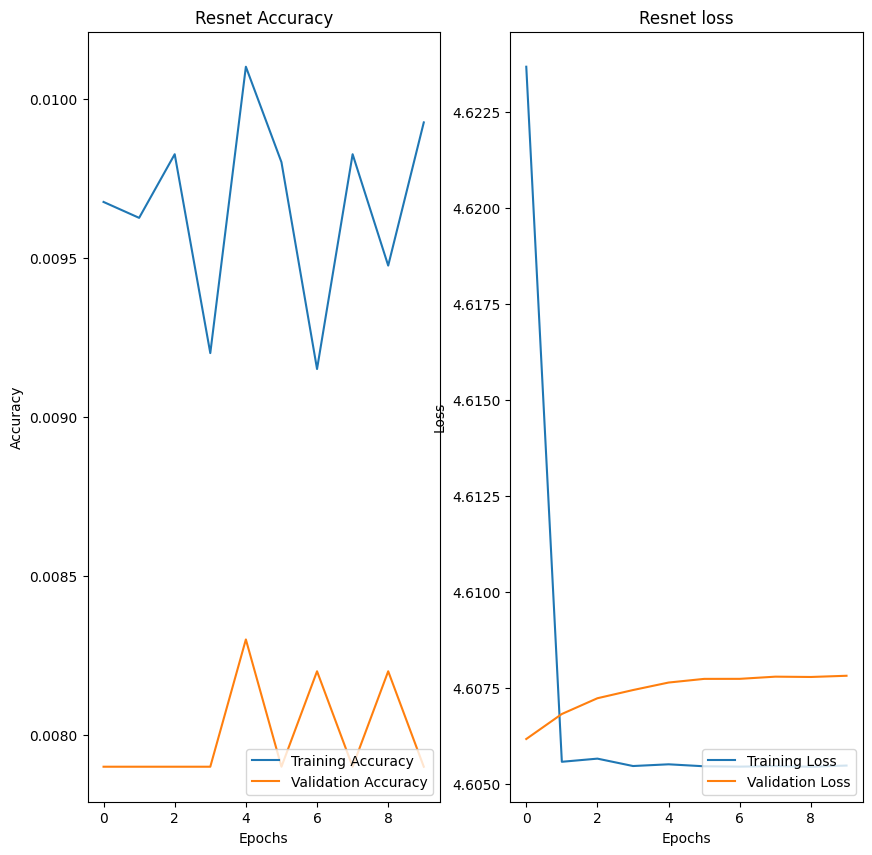

In [ ]:
plot_metrics(resnet_history,'Resnet')

In [ ]:
# Fine-tune the ResNet model
resnet_model.trainable = True  # Unfreeze the base model
resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

resnet_finetune_history = resnet_model.fit(datagen.flow(X_train,y_train,batch_size=64),
    validation_data=(X_test,y_test),
    epochs=10,
    verbose=1
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 234s 361ms/step - accuracy: 0.0101 - loss: 4.6048 - val_accuracy: 0.0079 - val_loss: 4.6078
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 229s 365ms/step - accuracy: 0.0097 - loss: 4.6050 - val_accuracy: 0.0079 - val_loss: 4.6078
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 365ms/step - accuracy: 0.0109 - loss: 4.6047 - val_accuracy: 0.0079 - val_loss: 4.6078
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 365ms/step - accuracy: 0.0097 - loss: 4.6051 - val_accuracy: 0.0079 - val_loss: 4.6078
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 230s 368ms/step - accuracy: 0.0109 - loss: 4.6049 - val_accuracy: 0.0079 - val_loss: 4.6078
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 299s 427ms/step - accuracy: 0.0092 - loss: 4.6050 - val_accuracy: 0.0079 - val_loss: 4.6078
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 423ms/step - accuracy: 0.0108 - loss: 4.6051 - val_accuracy: 0.0079 - val_loss: 4.6078
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 324s 426ms/step - accuracy: 0.0105 -

In [ ]:
test_loss, test_acc = resnet_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

In [ ]:
evaluate_model(resnet_model,X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.0070 - loss: 4.6077
Test Accuracy: 0.7900


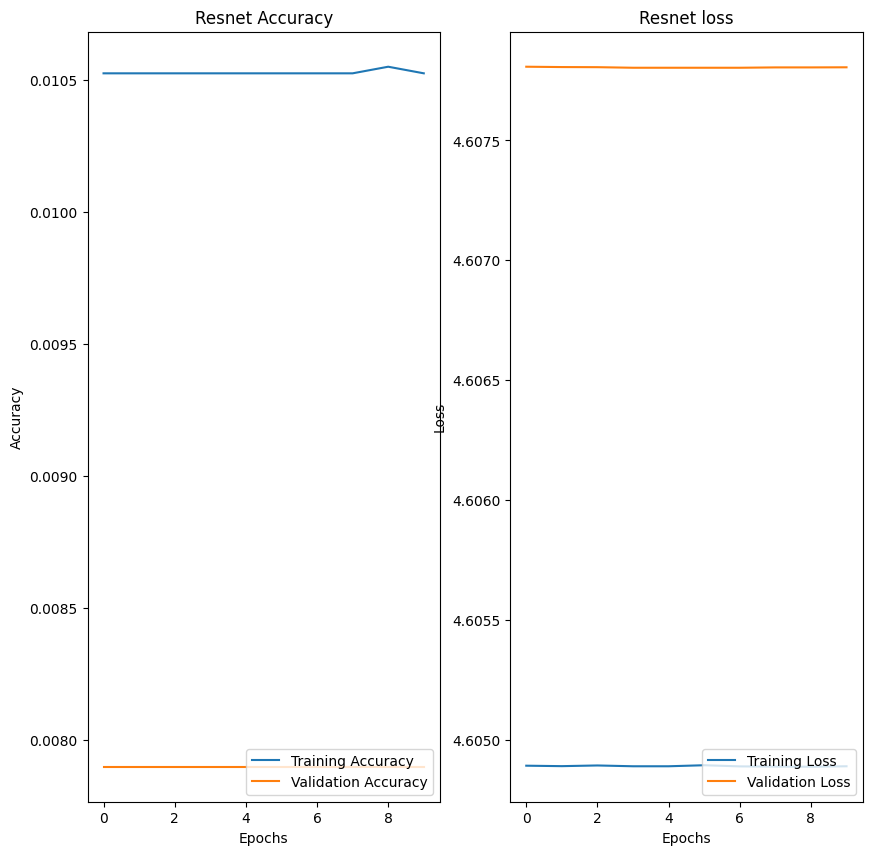

In [ ]:
plot_metrics(resnet_finetune_history,'Resnet')